## 1. Data Cleaning

### Importing Libraries and Loading the Dataset
Before getting started, we import the libraries we will be using for the data analysis:
- `pandas` is used for tabular data.
- `numpy` will be useful later for numerical operations.
- `matplotlib.pyplot` and `seaborn` are often used for visualisations (we'll use them later).


Next, we load the dataset using `pd.read_csv()`. This reads the CSV file into a DataFrame. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("DASH_A1.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'DASH_A1.csv'

As you can see from the initial output of the dataset, there are several issues that need to be addressed before performing analysis:
- Missing values
- Unsorted dates
- Duplicate rows

We will get to all of these issues below. 

### Data Overview
Before we begin cleaning, it is important to understand what the dataset looks like. We use `df.info()` to inspect the data types, number of values per column, and overall shape of the dataset.

In [ ]:
print("Dataset Structure:")
df.info()

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1184 non-null   object 
 1   Close   1159 non-null   float64
 2   High    1160 non-null   float64
 3   Low     1168 non-null   float64
 4   Open    1167 non-null   float64
 5   Volume  1158 non-null   float64
dtypes: float64(5), object(1)
memory usage: 55.6+ KB


We also check for missing values in each column to identify where cleaning is needed. We will address this issue further down.

In [ ]:
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
Date       0
Close     25
High      24
Low       16
Open      17
Volume    26
dtype: int64


### Sorting Data and Checking for Duplicates
Since this dataset represents time series data, where each row corresponds to a trading day for DoorDash (DASH), it is helpful to set the `Date` column as the index. This will make it easier to work with the data rather than keeping the unique index value. 

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

Now that we have set the date as the index, we can sort the data in chronological order. 

In [ ]:
df.sort_index(inplace=True)
df

Close        High         Low        Open      Volume
Date                                                                  
2020-12-09  189.509995  195.500000  163.800003  182.000000  25373700.0
2020-12-10  186.000000  187.695007  172.636002  179.710007         NaN
2020-12-11  175.000000  182.000000  168.250000  176.520004   4760600.0
2020-12-14  160.000000  170.000000  151.199997  169.100006   7859600.0
2020-12-15  158.889999  161.419998  153.759995  157.100006   5017000.0
2020-12-15  158.889999  161.419998  153.759995  157.100006   5017000.0
2020-12-16  158.050003  167.470001  157.199997  161.179993   3061300.0
2020-12-17  154.210007  161.660004         NaN  159.100006   6369800.0
2020-12-18  166.350006  169.949997  147.320007  154.210007   8157800.0
2020-12-21  160.229996  173.460007  155.000000  169.070007   3884200.0
2020-12-22  156.789993  163.210007  153.421997  161.050003   2386700.0
2020-12-23  158.220001  161.559998  150.250000  155.000000   1759900.0
2020-12-24  158.460007  158.600006  153.070007  157.380005    673000.0
2020-12-28  147.889999  158.449997  141.505005  158.250000   3807700.0
2020-12-29  141.270004  147.399994  139.639999  146.119995   3849500.0
2020-12-30  140.199997  147.979996  139.800003  144.399994   3121100.0
2020-12-31  142.750000  146.500000  135.380005  140.199997   2637300.0
2021-01-04  139.190002  143.619995  137.169998  142.500000   2026400.0
2021-01-05  144.429993  146.119995  137.835007  138.000000   1031800.0
2021-01-06  140.009995  142.000000  138.210007  141.270004   1931400.0
2021-01-07  152.770004  154.639999  139.434998  140.000000   3215200.0
2021-01-08  156.089996  158.309998  147.300003  152.000000   2548700.0
2021-01-11  167.000000  169.000000  153.190002  153.190002   2541300.0
2021-01-12  191.990005  201.929993  162.615005  165.500000   7081800.0
2021-01-13         NaN  215.500000  188.070007  192.410004   6058800.0
2021-01-14  207.240005  221.399994  195.330002  196.619995   4512000.0
2021-01-15  187.149994  212.089996  186.949997  207.000000   3351100.0
2021-01-19  198.750000  202.300003  185.539993  191.190002   3486200.0
2021-01-20  189.460007  203.820007  189.039993  200.000000   2066400.0
2021-01-21  190.889999  195.473999  183.192993  191.610001   2339400.0
2021-01-22  192.000000  197.070007  187.110001  190.199997   1679500.0
2021-01-25  191.809998  215.389999  191.309998  194.330002   3430400.0
2021-01-25  191.809998  215.389999  191.309998  194.330002   3430400.0
2021-01-26  198.220001  204.380005  196.410004  198.000000   2363000.0
2021-01-27  193.070007  256.089996  190.399994  200.000000   5918300.0
2021-01-28  183.800003  201.500000  183.479996  198.990005   1693000.0
2021-01-29  193.270004  194.990005  183.479996  189.399994   1851500.0
2021-02-01  191.169998  203.669998  187.563004  194.589996   1170100.0
2021-02-02  182.529999  197.600006  181.630005  191.949997   1338900.0
2021-02-03  180.580002  186.660004  178.326004  184.660004   1326100.0
2021-02-04  189.330002  191.876999  180.649994  181.380005   1142100.0
2021-02-05         NaN  190.916000  180.244995  189.570007   1521400.0
2021-02-08  177.429993  185.490005  174.210007  183.449997   1998000.0
2021-02-09  187.750000  192.279999  177.600006  177.710007   2137000.0
2021-02-10  215.160004  215.679993  190.000000  190.660004   3996900.0
2021-02-11  213.259995  222.000000  208.500000  208.500000   1949000.0
2021-02-12  202.970001  213.539993  202.509995  213.029999   1376300.0
2021-02-16  212.169998  226.470001  205.000000  205.600006   2663400.0
2021-02-17  197.869995  213.820007  194.089996  213.820007   2013900.0
2021-02-18  200.059998  201.410004  188.910004  194.300003   1728200.0
2021-02-19  205.970001  209.160004  199.229996  200.070007   1879200.0
2021-02-22  178.070007  201.990005  176.360001  198.000000   3149200.0
2021-02-23  173.500000  185.460007  165.550003  175.960007   3005400.0
2021-02-24  176.320007  180.550003  173.520004  174.360001   1984000.0
2021-02-25  166.869995  182.554993  163.7

Now, let's focus on duplicates. We check for two types:
- **Duplicate rows**: these are rows where all values (across every column) are identical.
- **Duplicate dates**: since this is time series data, each date should only appear once. 

In [ ]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

duplicate_dates = df[df.index.duplicated()]
print(f"Number of duplicate dates: {duplicate_dates.shape[0]}")
duplicate_dates = df[df.duplicated(keep=False)]
print(duplicate_dates)

Number of duplicate rows: 50
                 Close        High         Low        Open     Volume
Date                                                                 
2020-12-15  158.889999  161.419998  153.759995  157.100006  5017000.0
2020-12-15  158.889999  161.419998  153.759995  157.100006  5017000.0
2021-01-25  191.809998  215.389999  191.309998  194.330002  3430400.0
2021-01-25  191.809998  215.389999  191.309998  194.330002  3430400.0
2021-05-10  120.449997  125.089996  118.559998  124.900002  2277500.0
2021-05-10  120.449997  125.089996  118.559998  124.900002  2277500.0
2021-05-19  140.199997  140.729996  130.009995  130.360001  5588700.0
2021-05-19  140.199997  140.729996  130.009995  130.360001  5588700.0
2021-05-28  150.279999  154.220001  149.559998  152.000000  2238900.0
2021-05-28  150.279999  154.220001  149.559998  152.000000  2238900.0
2021-06-08  136.759995  142.910004  135.684998  139.820007  2968300.0
2021-06-08  136.759995  142.910004  135.684998  139.820007  2

From our check, it appears that the duplicate dates aligns with the duplicated rows, suggesting there are 50 rows that are exact copies of others. Since the dataset is time series, this is problematic — each date should represent a single trading day. Let's go ahead and delete all the duplicate rows.

In [ ]:
df.drop_duplicates(inplace=True)
print(f"Remaining duplicate rows: {df.duplicated().sum()}")

Remaining duplicate rows: 0


### Missing Data
After sorting and removing duplicates, the next step is to handle any missing values in the dataset. From our earlier check, we found that there are several missing entries per column. We follow the firm's official cleaning rules to handle missing data, one column at a time. 

Let's start with filling the missing values in the `Close` column first. They are forward-filled to avoid look-ahead bias.

In [ ]:
df['Close'] = df['Close'].ffill()
print(f"Remaining missing values in 'Close': {df['Close'].isnull().sum()}")

Remaining missing values in 'Close': 0


Now let's move on to the `Open` column, which should be filled using the previous day's `Close` price.

In [ ]:
df['Open'] = df['Open'].fillna(df['Close'].shift(1))
print(f"Remaining missing values in 'Open': {df['Open'].isnull().sum()}")

Remaining missing values in 'Open': 0


Next up is the the `High` and `Low` columns, which should be filled using the average value of that column for the month in which the missing entry appears.

In [ ]:
df['Month'] = pd.to_datetime(df.index).to_period('M')
monthly_high_mean = df.groupby('Month')['High'].transform('mean')
df['High'] = df['High'].fillna(monthly_high_mean)
monthly_low_mean = df.groupby('Month')['Low'].transform('mean')
df['Low'] = df['Low'].fillna(monthly_low_mean)
df.drop('Month', axis=1, inplace=True)

print(f"Remaining missing values in 'High': {df['High'].isnull().sum()}")
print(f"Remaining missing values in 'Low' : {df['Low'].isnull().sum()}")

Remaining missing values in 'High': 0
Remaining missing values in 'Low' : 0


Lastly, let's move on to the `Volume` column, where missing values should be filled with 0 if the `Open` and `Close` prices are equal on a day, indicating no trading activity. Otherwise, missing values should be filled with the median trading volume across the dataset.

In [ ]:
missing_volume = df['Volume'].isna()

zero_vol_mask = missing_volume & (df['Close'] == df['Open'])
df.loc[zero_vol_mask, 'Volume'] = 0

non_zero_vol_mask = missing_volume & (df['Close'] != df['Open'])
volume_median = df['Volume'].median()
df.loc[non_zero_vol_mask, 'Volume'] = volume_median

print(f"Remaining missing values in 'Volume': {df['Volume'].isnull().sum()}")

Remaining missing values in 'Volume': 0


Now that we have addressed each column, let's carry out a final check for any remaining missing values:

In [ ]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

At this stage, we have successfully cleaned the dataset following the firm's official guidelines. We will save the cleaned dataset to a new CSV file for reuse.

In [ ]:
df.to_csv('cleaned_data.csv')

## 2. Feature Engineering
With the dataset now cleaned, we move on to feature engineering, which is the process of creating new variables from existing data to carry out our analysis. We start with creating a new column for **simple daily returns**, which represents the percentage change in the stock’s closing price from one trading day to the next:

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()

Now let's calculate **logarithmic returns** (or log returns), which are calculated using the natural logarithm of the ratio between today’s and yesterday’s `Close` prices:

In [ ]:
df["PrevClose"] = df["Close"].shift(1)
df['LogReturn'] = np.log(df['Close'] / df["PrevClose"])

Momentum captures the rate of price change over a period. Here, we compute a **20-day momentum**, which measures how much the stock price has moved over the past 20 trading days. This tells us how strong the recent upward or downward movement has been:

In [ ]:
df['20D_Momentum'] = df['Close'] - df['Close'].shift(20)

Now we move on to calculate the **20-day Simple Moving Average (SMA)**. This smooths out short-term fluctuations by taking the average of the last 20 days of closing prices:


In [ ]:
df['20D_SMA'] = df['Close'].rolling(window=20).mean()

To assess short-term risk, we calculate the **20-day rolling volatility**, which is the standard deviation of daily returns over a 20-day window:

In [ ]:
df['20D_Volatility'] = df['Daily_Return'].rolling(window=20).std()

Next, let's extract the **day of the week** from the date index:

In [ ]:
df['Day_of_the_week'] = df.index.strftime('%a')


To detect unusual spikes in stock performance, we identify **price surge days**, which is when the daily return is more than 4 standard deviations above the mean of all daily returns.

In [ ]:
mean_return = df["Daily_Return"].mean()
std_return = df["Daily_Return"].std()
return_threshold = mean_return + (4 * std_return)

condition = df["Daily_Return"] > return_threshold

df["Price_Surge"] = condition

surge_days = df[df["Price_Surge"]]
print(f"Number of price surge days: {df['Price_Surge'].sum()}")
surge_days[["Close", "Daily_Return", "Price_Surge"]].head()

Number of price surge days: 3


Close  Daily_Return  Price_Surge
Date                                             
2021-01-12  191.990005      0.149641         True
2021-05-14  141.070007      0.221491         True
2023-11-02   87.790001      0.156653         True

To highlight days of unusually high trading activity, we identify **volume spike days** which is when the trading volume is more than 6 standard deviations above the mean volume.

In [ ]:
mean_volume = df["Volume"].mean()
std_volume = df["Volume"].std()
volume_threshold = mean_volume + (6 * std_volume)

condition = df["Volume"] > volume_threshold

df["Volume_Spike"] = condition

spike_days = df[df['Volume_Spike']]
print(f"Number of volume spike days: {df['Volume_Spike'].sum()}")
spike_days[['Volume', 'Volume_Spike']].head()

Number of volume spike days: 3


Volume  Volume_Spike
Date                                
2022-02-17  47405700.0          True
2023-12-15  30556000.0          True
2025-03-21  73637400.0          True

Let's move on to **Bollinger Bands**, which are indicators used to detect potential overbought or oversold conditions in a stock.

They consist of three components:
- A 20-day Simple Moving Average (SMA)
- An upper band 
- A lower band 

When the price moves toward the upper band, it may be considered **overbought**; toward the lower band, **oversold**.

In [ ]:
df['Dev'] = df['Close'].rolling(window=20).std()
df['BB_High'] = df['20D_SMA'] + 2 * df['Dev']
df['BB_Low'] = df['20D_SMA'] - 2 * df['Dev']

With all engineered features now added to the dataset, we are ready to proceed to the next stage of analysis.

The table below shows the new data frame, which now includes momentum, volatility, return metrics, and trading signals (e.g., surge/spike flags and Bollinger Bands).

In [ ]:
pd.set_option('display.max_rows', None)
df

Close        High         Low        Open      Volume  \
Date                                                                     
2020-12-09  189.509995  195.500000  163.800003  182.000000  25373700.0   
2020-12-10  186.000000  187.695007  172.636002  179.710007   3506600.0   
2020-12-11  175.000000  182.000000  168.250000  176.520004   4760600.0   
2020-12-14  160.000000  170.000000  151.199997  169.100006   7859600.0   
2020-12-15  158.889999  161.419998  153.759995  157.100006   5017000.0   
2020-12-16  158.050003  167.470001  157.199997  161.179993   3061300.0   
2020-12-17  154.210007  161.660004  152.148868  159.100006   6369800.0   
2020-12-18  166.350006  169.949997  147.320007  154.210007   8157800.0   
2020-12-21  160.229996  173.460007  155.000000  169.070007   3884200.0   
2020-12-22  156.789993  163.210007  153.421997  161.050003   2386700.0   
2020-12-23  158.220001  161.559998  150.250000  155.000000   1759900.0   
2020-12-24  158.460007  158.600006  153.070007  157.380005    673000.0   
2020-12-28  147.889999  158.449997  141.505005  158.250000   3807700.0   
2020-12-29  141.270004  147.399994  139.639999  146.119995   3849500.0   
2020-12-30  140.199997  147.979996  139.800003  144.399994   3121100.0   
2020-12-31  142.750000  146.500000  135.380005  140.199997   2637300.0   
2021-01-04  139.190002  143.619995  137.169998  142.500000   2026400.0   
2021-01-05  144.429993  146.119995  137.835007  138.000000   1031800.0   
2021-01-06  140.009995  142.000000  138.210007  141.270004   1931400.0   
2021-01-07  152.770004  154.639999  139.434998  140.000000   3215200.0   
2021-01-08  156.089996  158.309998  147.300003  152.000000   2548700.0   
2021-01-11  167.000000  169.000000  153.190002  153.190002   2541300.0   
2021-01-12  191.990005  201.929993  162.615005  165.500000   7081800.0   
2021-01-13  191.990005  215.500000  188.070007  192.410004   6058800.0   
2021-01-14  207.240005  221.399994  195.330002  196.619995   4512000.0   
2021-01-15  187.149994  212.089996  186.949997  207.000000   3351100.0   
2021-01-19  198.750000  202.300003  185.539993  191.190002   3486200.0   
2021-01-20  189.460007  203.820007  189.039993  200.000000   2066400.0   
2021-01-21  190.889999  195.473999  183.192993  191.610001   2339400.0   
2021-01-22  192.000000  197.070007  187.110001  190.199997   1679500.0   
2021-01-25  191.809998  215.389999  191.309998  194.330002   3430400.0   
2021-01-26  198.220001  204.380005  196.410004  198.000000   2363000.0   
2021-01-27  193.070007  256.089996  190.399994  200.000000   5918300.0   
2021-01-28  183.800003  201.500000  183.479996  198.990005   1693000.0   
2021-01-29  193.270004  194.990005  183.479996  189.399994   1851500.0   
2021-02-01  191.169998  203.669998  187.563004  194.589996   1170100.0   
2021-02-02  182.529999  197.600006  181.630005  191.949997   1338900.0   
2021-02-03  180.580002  186.660004  178.326004  184.660004   1326100.0   
2021-02-04  189.330002  191.876999  180.649994  181.380005   1142100.0   
2021-02-05  189.330002  190.916000  180.244995  189.570007   1521400.0   
2021-02-08  177.429993  185.490005  174.210007  183.449997   1998000.0   
2021-02-09  187.750000  192.279999  177.600006  177.710007   2137000.0   
2021-02-10  215.160004  215.679993  190.000000  190.660004   3996900.0   
2021-02-11  213.259995  222.000000  208.500000  208.500000   1949000.0   
2021-02-12  202.970001  213.539993  202.509995  213.029999   1376300.0   
2021-02-16  212.169998  226.470001  205.000000  205.600006   2663400.0   
2021-02-17  197.869995  213.820007  194.089996  213.820007   2013900.0   
2021-02-18  200.059998  201.410004  188.910004  194.300003   1728200.0   
2021-02-19  205.970001  209.160004  199.229996  200.070007   1879200.0   
2021-02-22  178.070007  201.990005  176.360001  198.000000   3149200.0   
2021-02-23  173.500000  185.460007  165.550003  175.960007   3005400.0   
2021-02-24  176.320007  180.550003  173.520004  174.360001   1984000.0   
2021-02-25  166.86999

## 3. Key Dates

Since othe task involves grouping data by year, we first extract the year from the date index and store it in a new column called Year. This allows us to easily perform yearly aggregations later.

Next, because one of the key metrics we need to analyze is volatility, we calculate the 20-day rolling standard deviation of daily returns. This serves as an estimate of how much the returns fluctuate over time. The choice of a 20-day window is based on guidance from the lecture, as it approximately represents one trading month and is commonly used in volatility analysis.

In [ ]:
df['Year'] = df.index.year

df['Rolling Volatility'] = df['Daily_Return'].rolling(window=20).std()

Because our goal is to find key dates and metricx for each year, we groups data by year and calculates.

For the **Highest Volatility Date** and its value, we find the largest value in the Rolling Volatility column, and retrieve its corresponding date by finding the index where this maximum value occurs. This tells us the most volatile day of the year and how intense the fluctuations were.

Similarly, we find the **Largest Price Surge** value by taking the maximum value from the Daily_Return column, which represents the highest single-day return. The Largest Price Surge Date is the index where this value occurs — the day with the strongest price increase.

For the **Largest Price Drop**, we use the minimum of the Daily_Return column, which identifies the biggest single-day loss. The Largest Price Drop Date is the date when this negative return happened.

To get the **Highest Volume Date**, we locate the date with the maximum value in the Volume column, showing the day with the most trading activity. The Highest Volume itself is simply that peak value of volume.

For the **Highest High**, we identify the maximum value in the High column, which shows the highest price reached during the year. The Highest High Date is the corresponding index — the day when this price was recorded.

For the **Lowest Low**, we find the minimum value in the Low column, representing the lowest intraday price of the year. The Lowest Low Date is the date when this low occurred.

Finally, the **Annual Open** is the first value in the Open column for each year — i.e., the price at which the stock first opened in that year. The **Annual Close** is the last value in the Close column for each year — the stock’s final closing price of the year.

The table below presents the results for key dates and annual metrics. Since we use a 20-day window to calculate rolling volatility, the year 2020, which contains only 17 trading days in the dataset, does not have sufficient data to compute this metric. As a result, both the Highest Volatility Date and Highest Volatility for 2020 appear as missing values.

In [ ]:
print("Key Dates Summary")
df.groupby('Year').agg(
    HighestVolatilityDate=('Rolling Volatility', 'idxmax'),
    HighestVolatility=('Rolling Volatility', 'max'),
    LargestPriceSurgeDate=('Daily_Return', 'idxmax'),
    LargestPriceSurge=('Daily_Return', 'max'),
    LargestPriceDropDate=('Daily_Return', 'idxmin'),
    LargestPriceDrop=('Daily_Return', 'min'),
    HighestVolumeDate=('Volume', 'idxmax'),
    HighestVolume=('Volume', 'max'),
    HighestHighDate=('High', 'idxmax'),
    HighestHigh=('High', 'max'),
    LowestLowDate=('Low', 'idxmin'),
    LowestLow=('Low', 'min'),
    AnnualOpen=('Open', 'first'),
    AnnualClose=('Close', 'last')
)

Key Dates Summary


HighestVolatilityDate  HighestVolatility LargestPriceSurgeDate  \
Year                                                                  
2020                   NaT                NaN            2020-12-18   
2021            2021-05-20           0.067393            2021-05-14   
2022            2022-06-01           0.080994            2022-03-16   
2023            2023-11-06           0.047470            2023-11-02   
2024            2024-02-27           0.033547            2024-08-02   
2025            2025-04-10           0.048324            2025-04-09   

      LargestPriceSurge LargestPriceDropDate  LargestPriceDrop  \
Year                                                             
2020           0.078724           2020-12-14         -0.085714   
2021           0.221491           2021-02-22         -0.135457   
2022           0.134512           2022-05-11         -0.131621   
2023           0.156653           2023-02-17         -0.075946   
2024           0.083457           2024-05-02         -0.103170   
2025           0.137738           2025-04-03         -0.080634   

     HighestVolumeDate  HighestVolume HighestHighDate  HighestHigh  \
Year                                                                 
2020        2020-12-09     25373700.0      2020-12-09   195.500000   
2021        2021-03-09     20400000.0      2021-11-15   257.250000   
2022        2022-02-17     47405700.0      2022-01-12   152.494995   
2023        2023-12-15     30556000.0      2023-12-11   103.980003   
2024        2024-05-02     22134800.0      2024-12-17   181.779999   
2025        2025-03-21     73637400.0      2025-06-06   220.880005   

     LowestLowDate   LowestLow  AnnualOpen  AnnualClose  
Year                                                     
2020    2020-12-31  135.380005  182.000000   142.750000  
2021    2021-05-13  110.129997  142.500000   148.899994  
2022    2022-10-24   41.365002  149.610001    48.820000  
2023    2023-01-06   45.931999   49.980000    98.889999  
2024    2024-01-04   93.330002   97.800003   167.750000  
2025    2025-04-07  155.399994  168.789993   218.119995

# 4. Data Visualisation

## a. Bollinger Bands and Subplots

### Price, Volume, and Volatility Overview

This section visualises key market dynamics of DoorDash’s stock over time.
We include technical indicators such as the Simple Moving Average (SMA) and Bollinger Bands, trading Volume, and Rolling Volatility to gain insights into price movement and risk.

- fig, (ax1, ax2, ax3) = plt.subplots(...): This creates three vertically stacked plots.
- height_ratios of 4:1:1 : Price chart occupies 4x more space than volume and volatility. This is deliberate, as price action is the most analyzed component.
- hspace=0.1: Minimizes the space between charts to make the figure compact and cohesive, while still readable.

### 1. Close Price with SMA and Bollinger Bands

The first subplot visualises:  
- The daily closing price of DASH stock.  
- The 20-day SMA, which smooths price trends.  
- The Bollinger Bands (grey dashed lines), which represent ±2 standard deviations from the SMA, often used to identify overbought or oversold conditions.
- fill_between(...) shades the area between the upper and lower Bollinger Bands in light grey, helping highlight periods of increased price volatility without overwhelming the visual.
- A transparency level of alpha=0.2 is chosen to make the shaded band slightly more prominent while still allowing other lines (like the Close price) to be seen clearly above it. This enhances visual contrast in volatile ranges.


### 2. Trading Volume

The second subplot presents the daily trading volume in millions.
Volume trends may signal investor sentiment or major news catalysts.

- Why not using bar() but plot()?
    - Using bar() to display trading volume can cause extremely high outliers (e.g., a single 70M-volume day) to appear visually invisible or barely noticeable. This happens because bar() draws thin vertical bars, and when a very high value only occurs once, its bar is too narrow to be visually noticeable at typical figure scales.
    - In contrast, plot() connects all data points with lines, so even single-day spikes stand out more clearly as sharp jumps in the line. This makes plot() more effective for revealing rare volume spikes while maintaining consistent visibility for normal volume fluctuations
- Scaling:
    - Volume is scaled down by 1e6 (dividing by 1 million) so that the y-axis reads in millions (M)
    - e.g., 70M instead of 70,000,000 keeping labels clean and aligned with industry visual standards like Yahoo Finance.

### 3. Rolling Volatility (20-Day) and Finalise

The third subplot shows 20-day rolling volatility, which reflects the variability of returns.
Higher volatility suggests higher uncertainty and risk.

- axhline(...) adds a dashed grey line representing the mean volatility, helping viewers identify whether current volatility is above or below average - useful for assessing market conditions.
- fill_between(...) adds a subtle shaded region (alpha=0.1) under the volatility curve to visually emphasize spikes, while still preserving the clean minimalist layout.

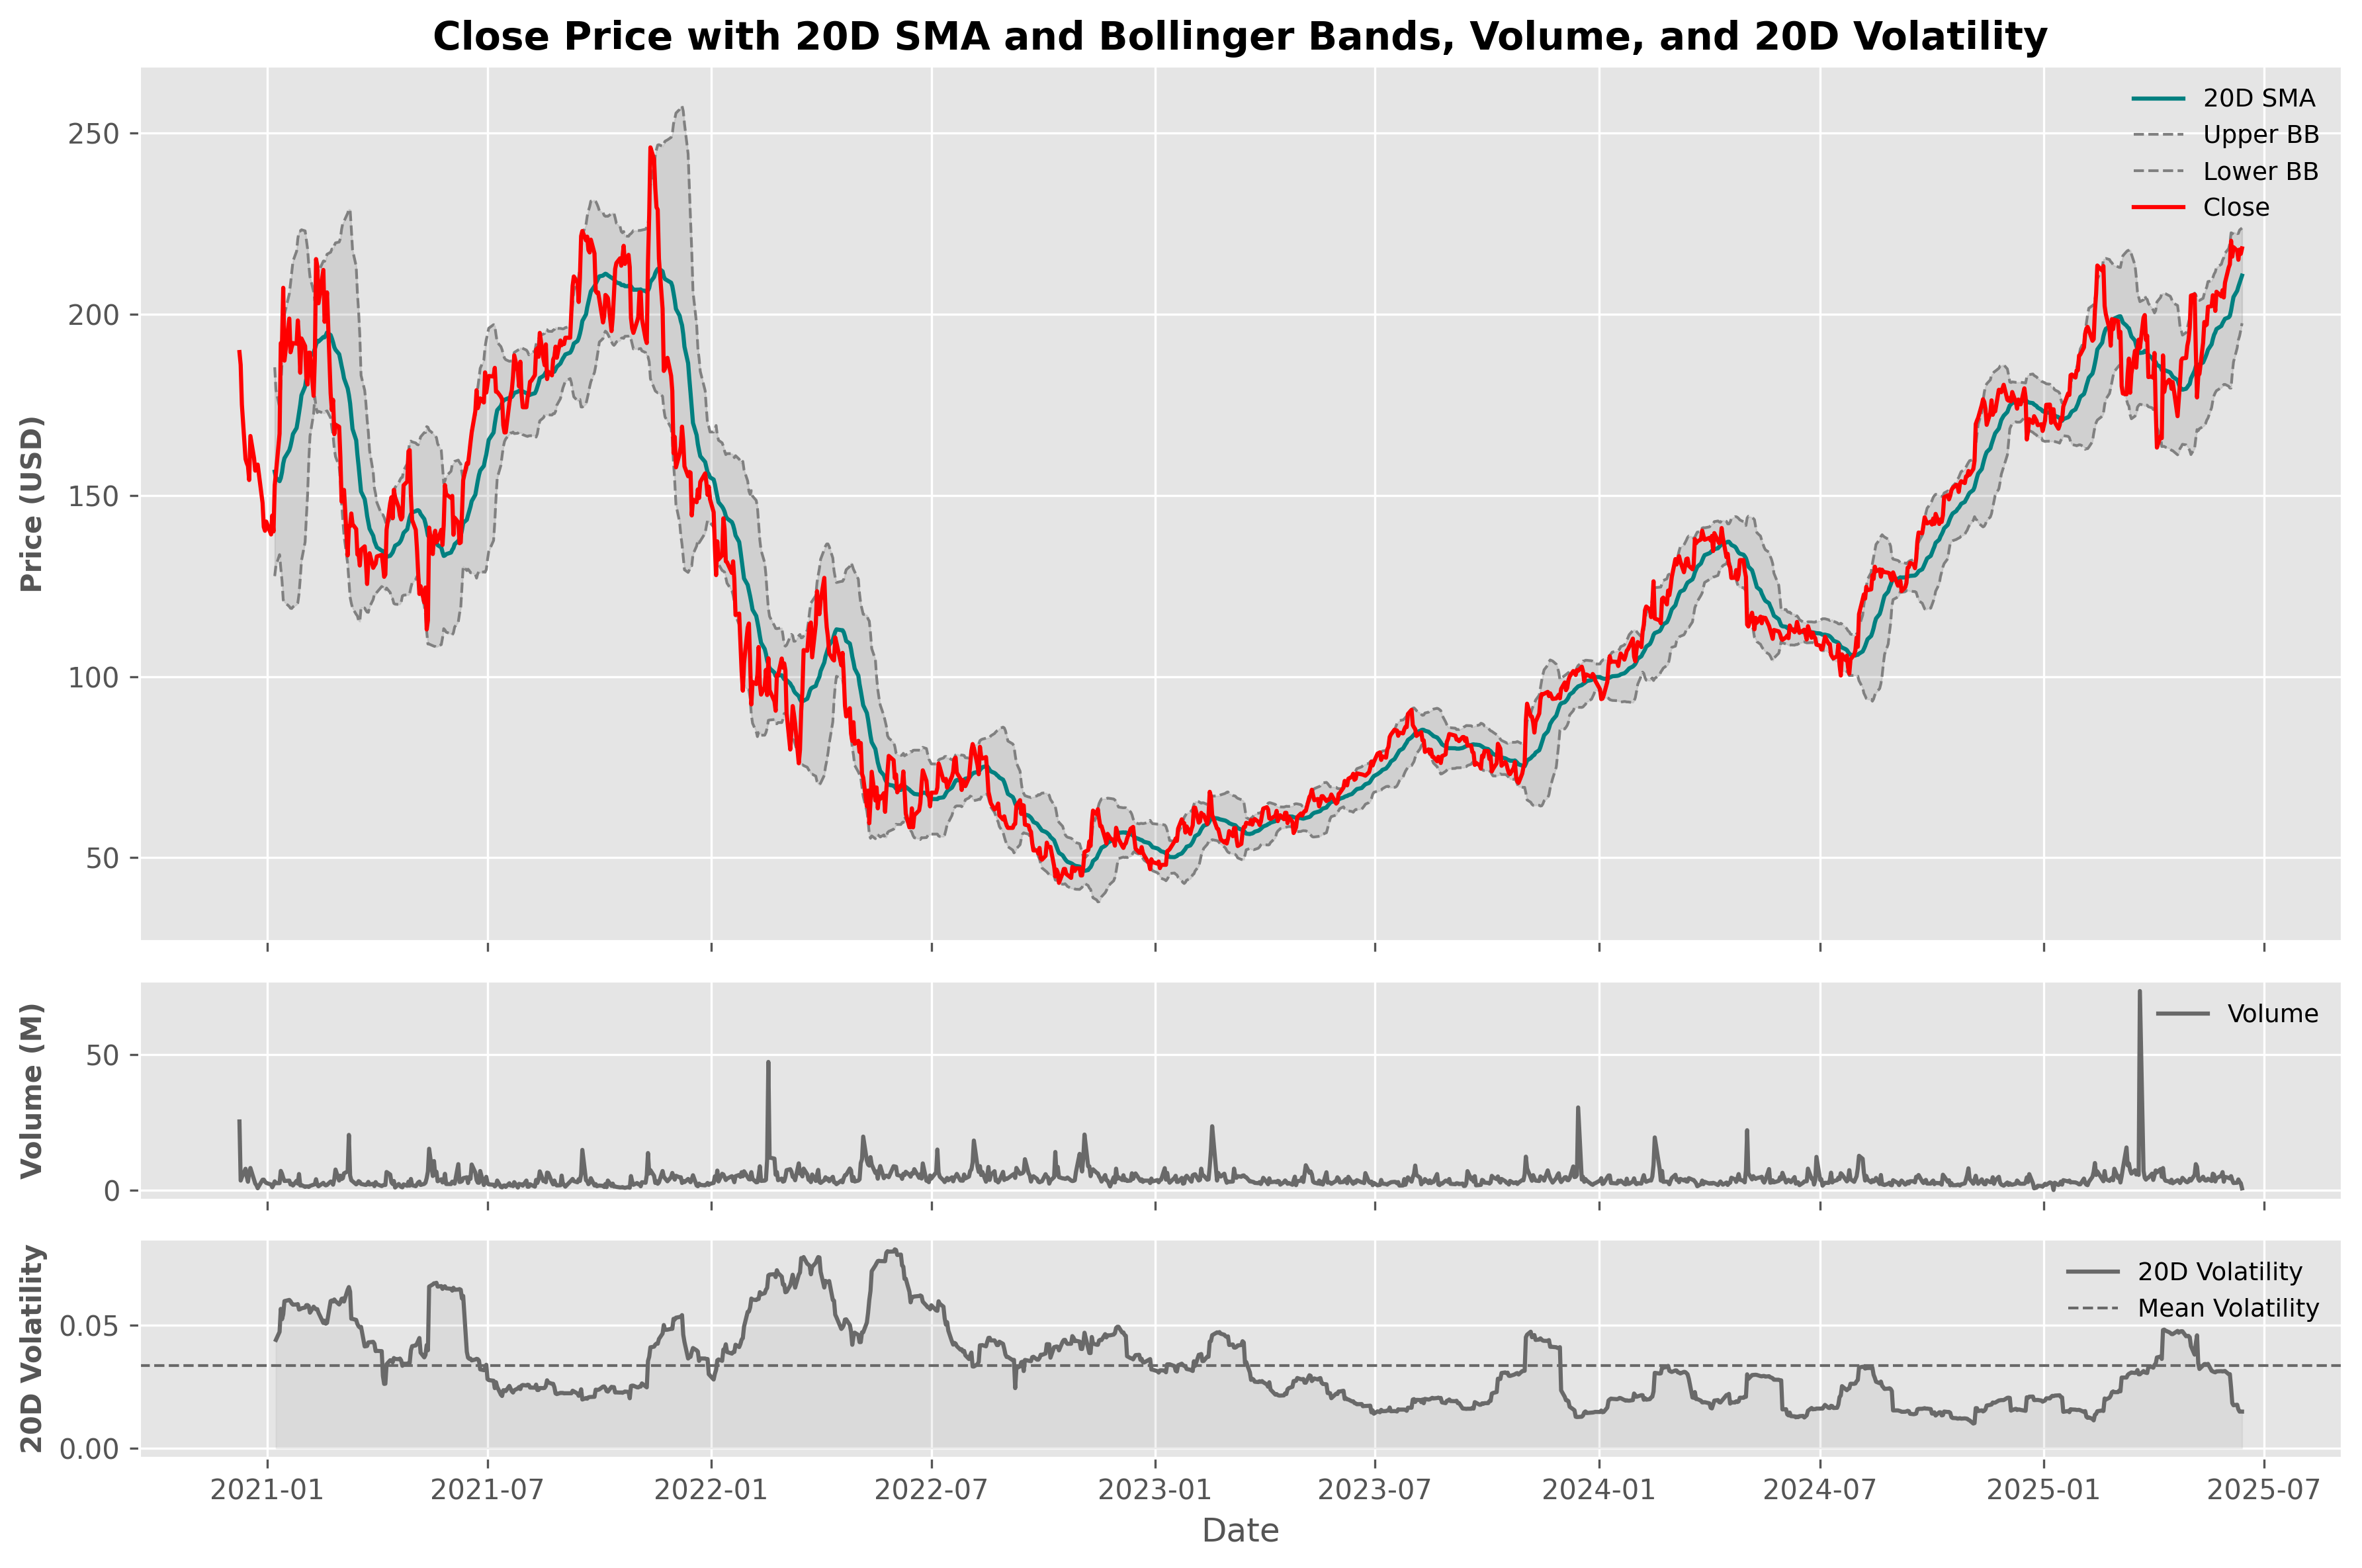

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), dpi=300, sharex=True, gridspec_kw={"height_ratios": [4, 1, 1]})
fig.subplots_adjust(hspace=0.1)

# 1. Close with SMA and Bollinger Bands
ax1.plot(df.index, df['20D_SMA'], label='20D SMA', color="teal")
ax1.plot(df.index, df['BB_High'], linestyle='--', color='grey', label='Upper BB', linewidth=1)
ax1.plot(df.index, df['BB_Low'], linestyle='--', color='grey', label='Lower BB', linewidth=1)
ax1.fill_between(df.index, df['BB_High'], df['BB_Low'], color='grey', alpha=0.2)
ax1.plot(df.index, df['Close'], label='Close', color="red", linewidth=1.5)
ax1.set_title('Close Price with 20D SMA and Bollinger Bands, Volume, and 20D Volatility', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price (USD)', fontsize=10, fontweight='bold')
ax1.legend(loc='upper right', frameon=False, fontsize=9)


# 2. Volume
ax2.plot(df.index, df['Volume'] / 1e6, label='Volume', color='dimgrey')
ax2.set_ylabel('Volume (M)', fontsize=10, fontweight='bold')
ax2.legend(loc='upper right', frameon=False, fontsize=9)

# 3. Rolling Volatility
ax3.plot(df.index, df['20D_Volatility'], label='20D Volatility', color='dimgrey')
ax3.set_ylabel('20D Volatility', fontsize=10, fontweight='bold')
ax3.axhline(df["20D_Volatility"].mean(), color='dimgrey', linestyle='--', linewidth=1, label="Mean Volatility")
ax3.fill_between(df.index, df["20D_Volatility"], color='grey', alpha=0.1)
ax3.legend(loc='upper right', frameon=False, fontsize=9)

plt.xlabel('Date')
fig.align_ylabels([ax1, ax2, ax3])
plt.tight_layout()
plt.show()

## b. Histogram of Logarithmic Returns
This plot visualises the distribution of daily **logarithmic returns** for DoorDash stock.

* Log returns are often preferred in financial analysis due to their time-additive property and symmetry in treating positive and negative changes.
* A `ggplot` style is applied for consistent visual aesthetics, with black edges added to each bar for better intuitive contrast.
* We centred the histogram along the x-axis using `lim = max(abs(df.LogReturn.min()), abs(df.LogReturn.max()))`, and `plt.xlim(-lim, lim)` - setting the limit on both ends as the largest absolute value of the return to achieve a better visual clarity. 

### How we determined the `bins=` value
* We decided to use a frequently-used method in finance context, called the **Square Root Rule** (taking the square root of total data points and round to the nearest whole number) to determine the number of bins we want to have on our histogram. We did this by setting `bins = int(np.sqrt(len(df.LogReturn)))` and using that as the `bins=` in the `plt.hist()`. The operation returned 33 bins, leaving us with a histogram that aligns with the benefit of using the sqrt rule, stated by [LeadingEdgeGroup](https://www.leadingedgegroup.com/histograms/),
    >"It offers a balance between capturing trends and avoiding noise."

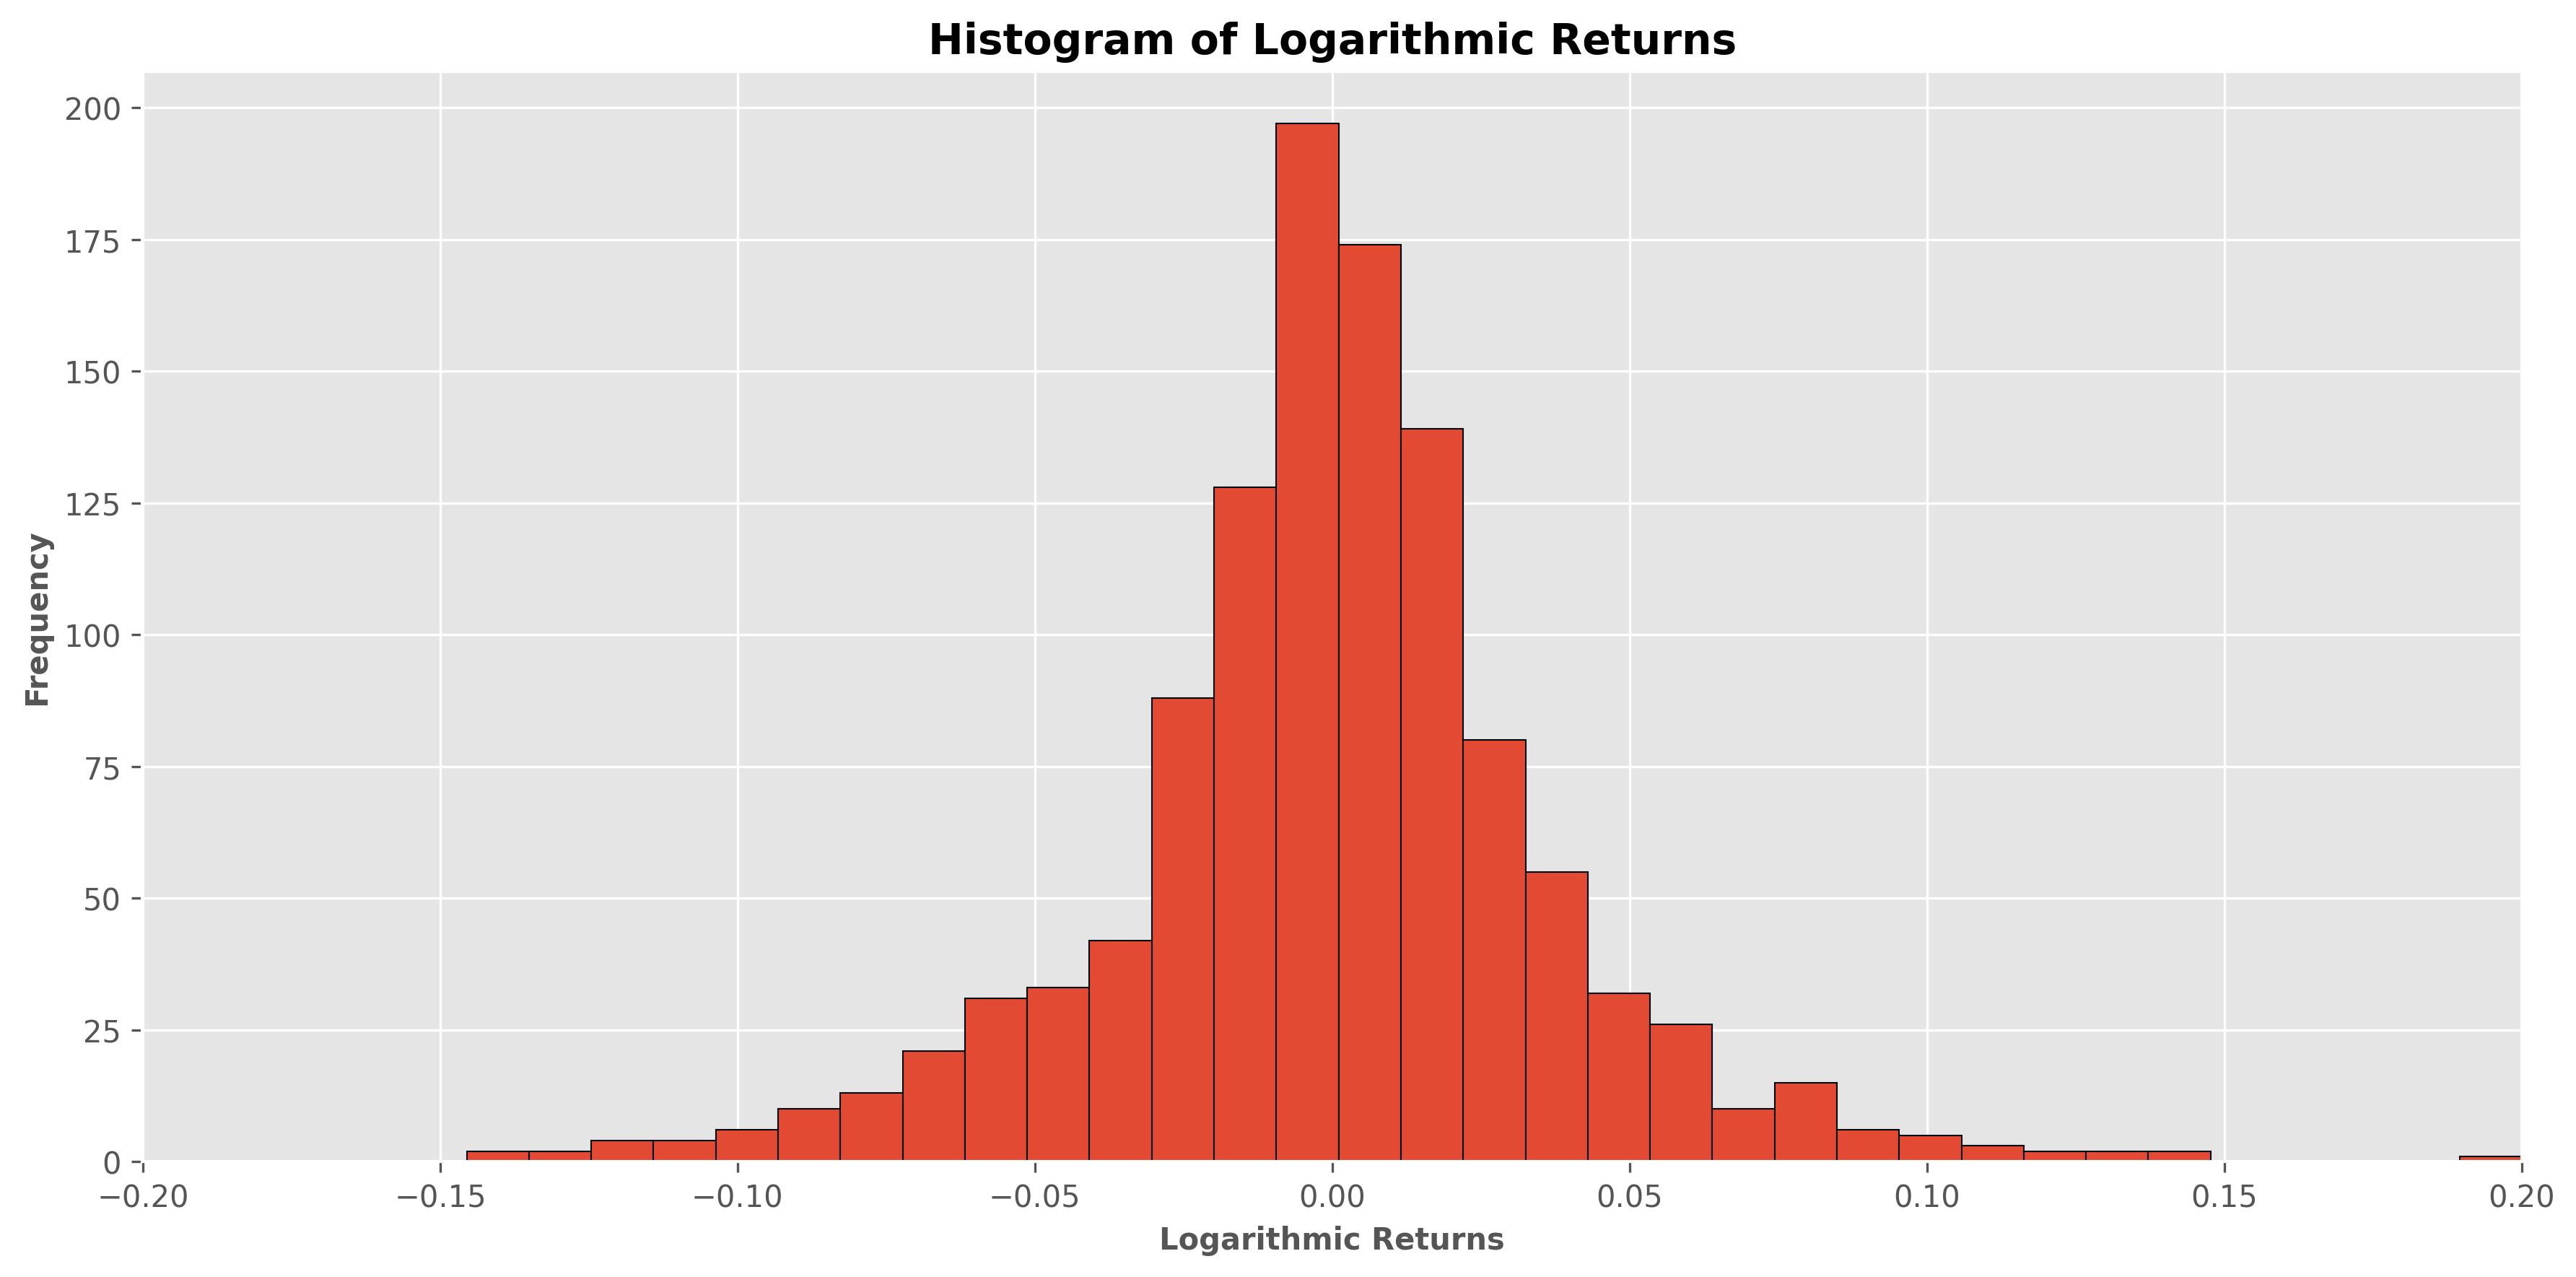

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Using square root rule to determine the number of histogram bins
bins = int(np.sqrt(len(df.LogReturn)))

plt.figure(figsize=(12, 6), dpi=300)
plt.hist(df.LogReturn, bins=bins, edgecolor='k')
plt.title("Histogram of Logarithmic Returns", fontsize=14, fontweight='bold')

plt.ylabel("Frequency", fontsize=10, fontweight='bold')
plt.xlabel("Logarithmic Returns", fontsize=10, fontweight='bold')

#set xlim to centre the plot
lim = max(abs(df.LogReturn.min()), abs(df.LogReturn.max()))
plt.xlim(-lim, lim)

plt.tight_layout()
plt.show()

## c. Scatter Plot: Volume vs. Daily Return

This section explores the relationship between **daily return** and **trading volume** for DoorDash stock using a scatter plot.

* Scatter plots are well-suited for visualising potential correlation patterns, outliers, and clusters between two continuous variables.
* Each point represents a single trading day, plotting the daily return on the x-axis and the corresponding trading volume on the y-axis.
* To enhance interpretability, the **colour of each point** represents the *magnitude* of return (regardless of sign) using the perceptually-uniform `"viridis"` colormap. This is set via `c=np.abs(df.Daily_Return)` and `cmap="viridis"`.
* The use of `alpha=0.5` (transparency) allows overlapping points to remain visible, which is useful in dense regions.
* The use of `edgecolor="black"` around each scatter marker improves visibility.
* `ggplot` style is applied for clarity and consistency across all charts.

This chart helps assess whether higher returns are associated with higher trading activity, although in this case, no strong linear relationship is immediately evident.

### 1. Linear Scale Version - Volume in Millions

This version uses the raw trading volume scaled down to millions via `df.Volume / 1e6`.

- The y-axis is manually relabelled with `plt.ylabel("Volume (M)")` to reflect the new scale.
- The x-axis is centred using `lim = abs(df.Daily_Return).max() + 0.02` followed by `plt.xlim(-lim, lim)`, ensuring both tails are equally visible while slightly padding the outer edges to fully capture the maximum absolute daily returns.
- A `plt.colorbar()` is added and labelled `|Daily Return| (Magnitude)` to explain the color encoding of magnitude.
  
This approach offers an intuitive, clean visual, but due to extreme spikes (e.g., a single 70M+ day), smaller volume observations can be compressed visually.

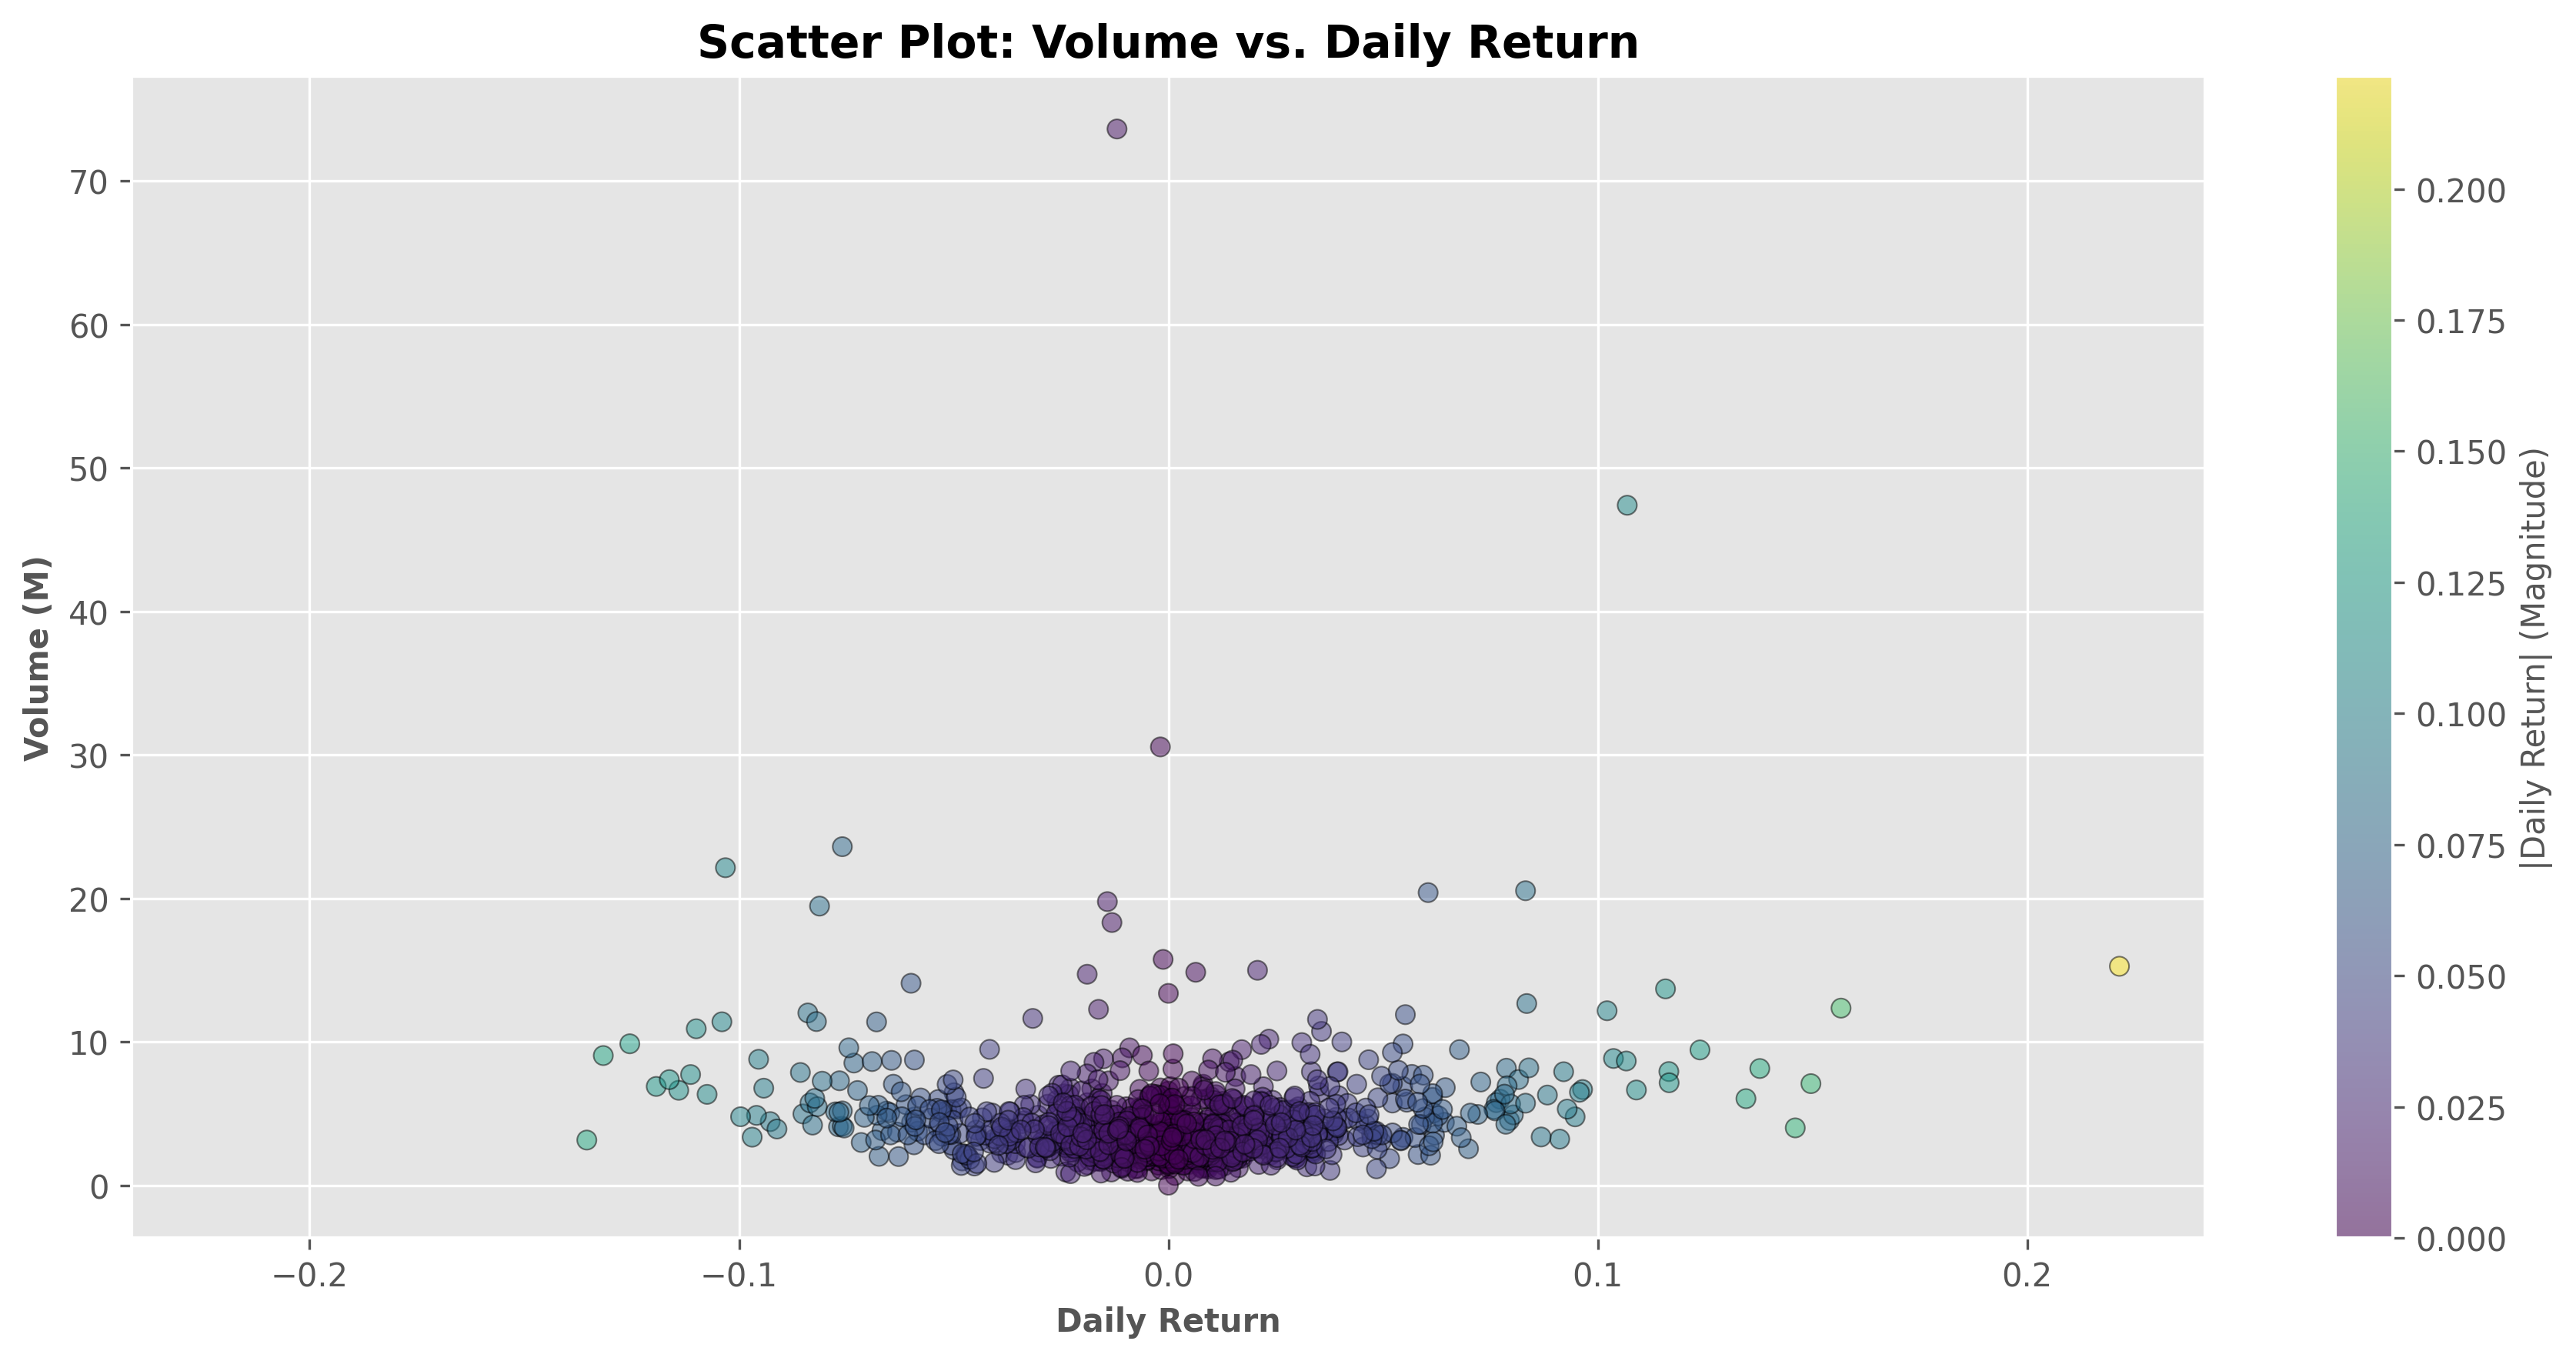

In [ ]:
# Colorscale   

plt.style.use("ggplot")

plt.figure(figsize=(12, 6), dpi=300)
plt.scatter(df.Daily_Return, df.Volume / 1e6, c=np.abs(df.Daily_Return), cmap="viridis", alpha=0.5, edgecolor="black")

plt.title("Scatter Plot: Volume vs. Daily Return", fontsize=14, fontweight='bold')
plt.xlabel("Daily Return", fontsize=10, fontweight='bold')
plt.ylabel("Volume (M)", fontsize=10, fontweight='bold')
lim = abs(df.Daily_Return).max() + 0.02
plt.xlim(-lim, lim)

plt.colorbar().set_label('|Daily Return| (Magnitude)', fontsize=10)

plt.tight_layout()
plt.show()

### OPTIONAL: 2. Logarithmic Scale Version - Volume

To address the **positive skew** and **visual compression** caused by outlier volume days, we apply a log transformation to the y-axis using `plt.yscale("log")`.

- This transformation compresses large values while expanding the lower-volume range, revealing hidden structures in the data.
- No rescaling of volume is done here (i.e., we use raw `df.Volume`) since log scale already addresses numeric scaling.
- As noted by [Spotfire](https://www.spotfire.com/glossary/what-is-a-logarithmic-chart),  
  > "A logarithmic chart is ideal to be used in two scenarios: 
    > * When there is skewness towards large values or when some points are much smaller or larger than the remainder of the data. For instance, if a chart is displaying the profits of 100 branches of a department store and two or three branches have huge sales compared to the other branches. This will make the other 98 stores’ data more compressed and harder to see."

- We retain the same colour and edge styling as the linear version for consistency.
- Since `log` scale does not support zero, `plt.ylim()` is omitted, and the y-axis automatically adjusts to the smallest positive value.
  
The plot shows that trading days with volume around $10^7$ tend to coincide with **high-magnitude returns**. This suggests that moderately high trading activity is often linked to significant market moves, reinforcing the connection between **return volatility and volume**.

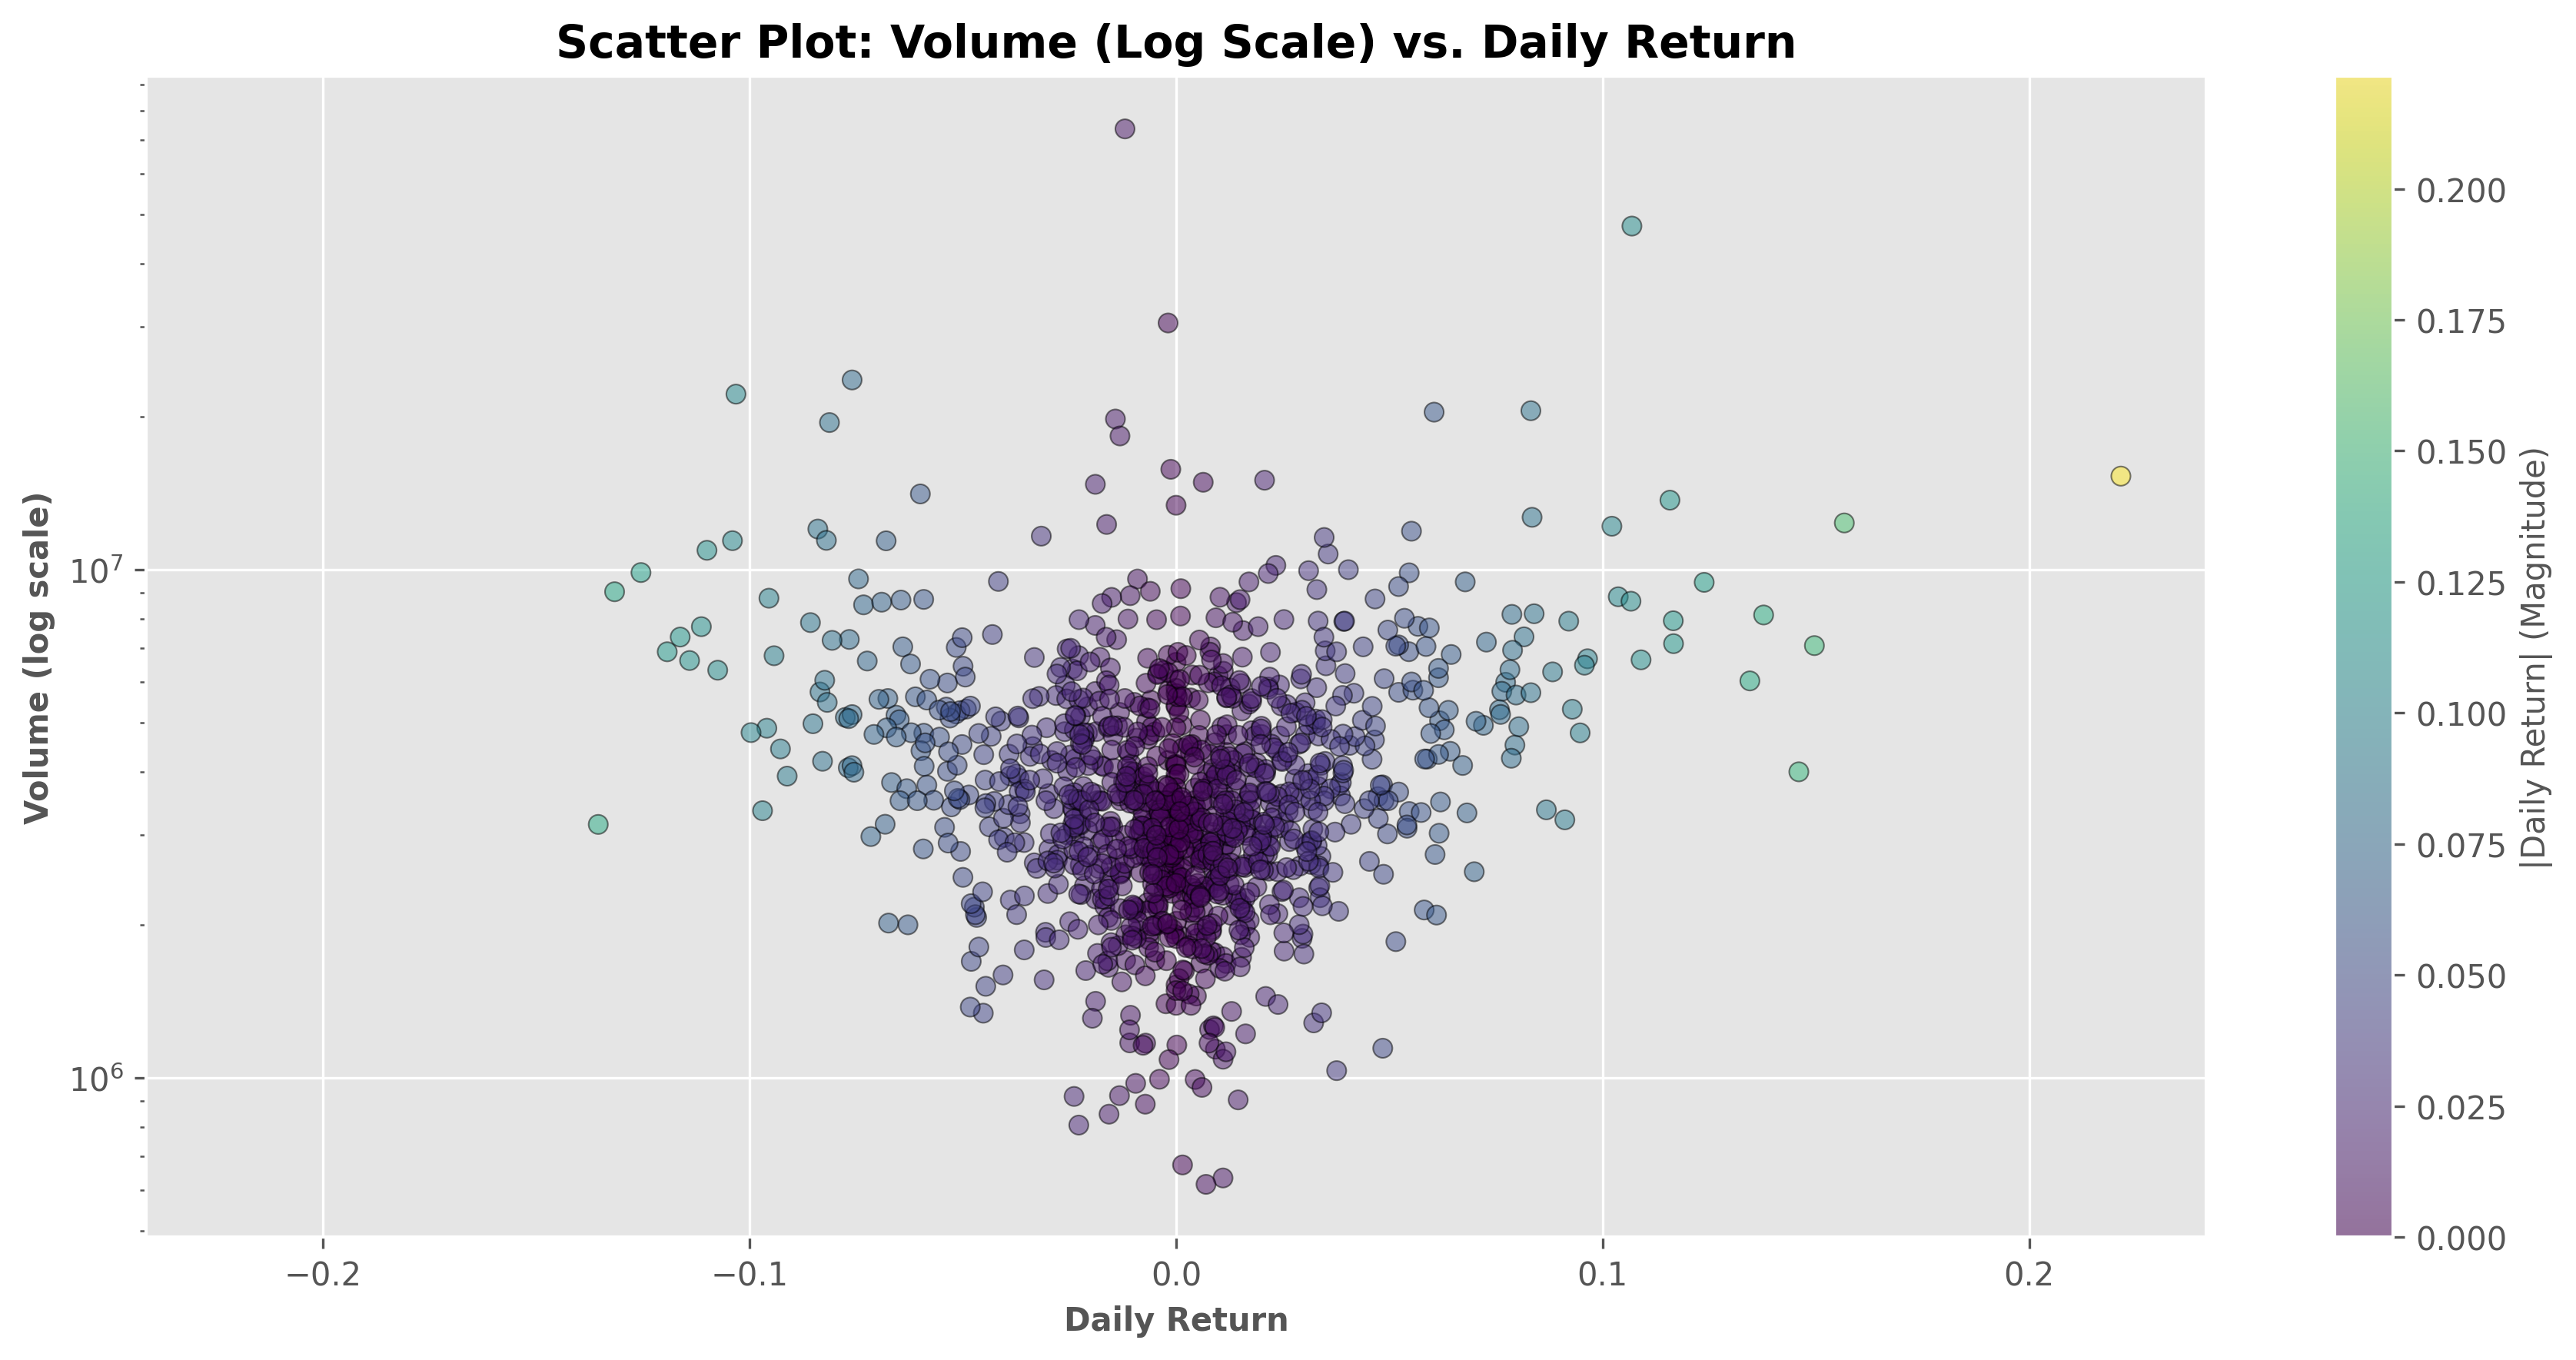

In [ ]:
# Colorscale & log volume  

plt.style.use("ggplot")

plt.figure(figsize=(12, 6), dpi=300)
plt.scatter(df.Daily_Return, df.Volume, c=np.abs(df.Daily_Return), cmap="viridis", alpha=0.5, edgecolor="black")

plt.yscale("log")

plt.title("Scatter Plot: Volume (Log Scale) vs. Daily Return", fontsize=14, fontweight='bold')
plt.xlabel("Daily Return", fontsize=10, fontweight='bold')
plt.ylabel("Volume (log scale)", fontsize=10, fontweight='bold')
lim = abs(df.Daily_Return).max() + 0.02
plt.xlim(-lim, lim)

plt.colorbar().set_label('|Daily Return| (Magnitude)', fontsize=10)

plt.tight_layout()
plt.show()

# 5. Reporting

### Data Analyst A
In terms of key observations, the 20-day SMA has been trending upwards in the recent months, showing positive momentum. The stock price has been traded higher than the SMA recently with a bullish crossover at around April 2025. This bullish signal was accompanied by a spike in trading volume and increased volatility at the time, confirming the strength of the bullish signal. Additionally, periods of high trading volume tend to align with sharp increases in volatility, suggesting a positive correlation. However, the stock price is near the upper limits of the Bollinger Bands, indicating that the stock is likely overbought now and therefore it may not be an ideal time to buy the stock. Although there is a positive trend, based on technical analysis, it is not a good time to increase stakes in DoorDash.

### Data Analyst B
After reaching a high of $\text{\$257.25}$ in November 2021, the stock dropped to a low of $\text{\$41.37}$ in October 2022, illustrating potential investment risks. However, since bottoming out, DASH has started to recover. The recent price rise, accompanied by a significant increase in trading volume in 2025, suggests strong market confidence and a positive foundation for future growth.

Based on this, I recommend the company increase its DASH holdings with a strategy of cautious optimism. The continued recovery is a promising sign, but the key test is whether the price can break the long-term resistance level of $\text{\$257.25}$. Therefore, this investment should be seen as a strategic bet on DASH's potential to initiate a new growth cycle. The company should closely monitor the stock as it nears its previous high and be prepared for short-term volatility.

### Data Analyst C
Recommendation: Increase in our stake (gradually)

DoorDash’s stock experienced high volatility following its IPO in December 2020, with a rapid rise to a highest close of $\text{\$257}$ in November 2021 followed by a steep decline to a lowest close of $\text{\$41}$ in October 2022. This trend is further reflected in the histogram of logarithmic returns, which shows a distribution centered around zero but with a longer left tail, indicating that while daily returns were usually modest, the stock was more prone to sharp negative swings than extreme gains. This asymmetry captures the downside risk during earlier periods of volatility, particularly in 2021–2022. 

After bottoming out, the stock entered a period of gradual recovery through mid-2024, accompanied by reduced volatility, as indicated by the narrowing of the Bollinger Bands. Beginning in 2023, the stock began a sustained uptrend, moving steadily upward with a few sharp pullbacks. The price has often reached the upper Bollinger Band, a bullish signal showing upward momentum. Given the stock’s recent upward momentum and reduced volatility, I recommend a cautious increase in stake. However, we should maintain a long-term perspective and remain mindful of historical downside risk, as reflected in the return distribution and earlier price swings.


### Data Analyst D
Since 2023, DoorDash's stock has demonstrated a clear upward trend. However, both trading volume and 20-day rolling volatility have recently shown signs of cooling off, suggesting that the pace of growth may be slowing. With the current price at $\text{\$218.30}$ - approaching the historical high of $\text{\$257.25}$ - the potential for further appreciation appears limited (approximately 17.8%). Additionally, the histogram of logarithmic returns displays a near-normal distribution centered around zero, indicating a relatively balanced probability of gains and losses. Moreover, the fact that its current price is trading above its volume-weighted average price (VWAP) may also suggest that the stock is somewhat overvalued relative to recent volume-adjusted pricing. 

Given the current risk-return profile, I recommend a cautious approach. While the recent price recovery suggests some growth momentum, declining volatility and volume may reflect decreasing investor interest. This could hinder the stock's ability to sustain its upward trajectory. Therefore, it would be prudent for the firm to hold its existing position in DoorDash rather than increase its holding until stronger market signals and fundamental support emerge.


### Data Analyst E
Market Trend and Risk Summary

The volatility reached its peak by 2022-06-01 (0.081), marking severe price movements. The trading’s most vigorous day was on 2025-03-21 when volume surged to a massive 73.6M shares, marking strong market activity. The largest leap was on 2021-05-14 (+22.15%), and the greatest fall was on 2021-02-22 (−13.55%). The price dipped as low as $\text{\$41.37}$ in October 2022 but recovered to above $\text{\$220}$ by June 2025. The Bollinger Bands and volatility indicators show renewed vigour. Based on the comeback and trading activity, a moderate stake increase is advised, noting historical selloffs when volatility was at its highest.

The histogram illustrates the log returns of DoorDash congregate around 0 overall, indicating steady daily activity with few radical outliers. The scatter plot illustrates no strong correlation between volume and return but shows the tendency that greater returns (especially for yellow dot) typically correlate with the greater volume increases, showcasing large price movements are related to increased activity.

Recommendation: buy

With recent impetus and volatility normalization after 2023, our suggestion is to increase the stake moderately, provided the entry is contingent on the Bollinger Band status and daily volatility remaining below 5%, especially during tranquil phases such as Q3 2023.


### Data Analyst F
Based on the technical indicators and charts from our analysis, I recommend a small increase in our position in DoorDash. The price has stayed above its 20D SMA with frequent pushes toward the upper Bollinger Band, showing continuous momentum. The scatterplot showed that larger price swings coincided with moderately high volumes (approx 10M) rather than extreme volume spikes (e.g., 70M+), suggesting that price moves perhaps stem from steady investor activities. Paired with the return distribution appearing fairly balanced on the histogram, the current status supports a slightly positive outlook, though not enough to justify a larger buy.